<a href="https://colab.research.google.com/github/LibbyFender/Learning/blob/master/SPEX650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

American University
SPEX 650 Quantitative Analysis
May - June 2020

Ticket Time Machine Research

In [1]:
#Library imports and loading data (5/27/2020)
import pandas as pd
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task complete 5/30/20
To-do List, connect google results directly to this form. It is currently from local .csv
df = pd.read_csv('/Survey_1Responses.csv')
/Survey_1Responses.csv  /content/drive/My Drive/Survey_1Responses.gsheet

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


#Load dataframe from google workbook 5/30

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/XXXXXXXXXXXXXXXXXXXXX')

In [ ]:
sheet = wb.worksheet('Form Responses 1')
data = sheet.get_all_values()
df = pd.DataFrame(data)

In [ ]:
df.head()

5/30/20 Update: when connecting directly from gsheet, column names become first row of data. I will need to either research how to ID column names directly in google sheet, or correct here.

5/28 note: Updating column names for ease of use. Current column names are questions from survey.
5/30 note: not ideal method for a google sheet.

# Load dataframe from local .csv

In [2]:
df = pd.read_csv('Survey_1Responses.csv')
# /Survey_1Responses.csv /content/drive/My Drive/Survey_1Responses.gsheet

In [3]:
df.shape

(99, 23)

In [4]:
columns = ['quizTaken', 'age', 'zip', 'enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust','na_printed', 'na_cust', 'when_cust', 'open']
df = df.iloc[1:] #Observations in Row 1 deleted. They are my responses from testing the form and entering random gibberish.

In [5]:
print(len(columns), len(df.columns))

23 23


In [6]:
df.columns =columns

In [7]:
df.tail(3)

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open
96,6/12/2020 9:14:05,18-24,60069.0,Agree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Disagree,Disagree,4-6,Often,Always,Some events,Some events,Rarely,Often,Rarely,Often,Rarely,Never,Never,"Player milestone, such as single game record",While I prefer printed tickets for the nostalg...
97,6/13/2020 19:23:36,55-64,14220.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,13 or more.,Some events,Some events,Some events,Often,Rarely,Never,Never,Never,Never,Never,Never,NaN,NaN
98,6/15/2020 11:14:29,45-54,32821.0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,10-12,Never,Never,Never,Never,Some events,Never,Never,Never,Never,Never,Never,Never,Nobody wants printed tickets. it's a dead market


In [ ]:
#5/28 Notes As expected, zip is a float, all other items are object types. We need to change to numerical values and address null value in zip code.
df.info()
#5/30 Notes: when loaded from a google sheet, null values are not flagged as null, and all items, including zip code are object type.

In [ ]:
print(df.zip.describe(), df.zip.sum())
#Min and Max suggest acceptable range. Sum is a whole number, which suggests whole numbers.
#5/30 Note, because zip now an object, the sum combines them like a string. This code does not make sense after adjusting to sheet upload.
#6/9/20 A well connected member of my network elevated the profile of the survey, and now I have a much larger dataset. I did not address null values in some inputs because I didn't have any. Data will require much more cleaning now, but... We have a better sample

count       98.000000
mean     51947.357143
std      36990.491324
min          0.000000
25%      20009.750000
50%      41652.000000
75%      92029.000000
max      99336.000000
Name: zip, dtype: float64 5090841


In [ ]:
print(len(df.quizTaken), df.quizTaken.max(), df.quizTaken.min())

98 6/9/2020 8:54:31 5/26/2020 22:58:21


In [8]:
df.zip.fillna('00000', inplace=True)

In [9]:
df['zip'] = df.zip.astype(int)

In [10]:
df.info()
#5/30 I'm thinking more about this... Zip codes are categorial, not integers. They hold no rank, but lower number is East Coast and higher number is West coast.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 1 to 98
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           98 non-null     object
 1   age                 97 non-null     object
 2   zip                 98 non-null     int64 
 3   enjoy_music         97 non-null     object
 4   enjoy_sports        97 non-null     object
 5   enjoy_outdoor       97 non-null     object
 6   enjoy_culture       97 non-null     object
 7   enjoy_performances  97 non-null     object
 8   buy_souvenir        97 non-null     object
 9   event_att           98 non-null     object
 10  save_stub           97 non-null     object
 11  prefer1             96 non-null     object
 12  prefer2             96 non-null     object
 13  want_printed        97 non-null     object
 14  buy_printed         97 non-null     object
 15  ps_printed          95 non-null     object
 16  ps_cust             94 non-n

In [ ]:
df.groupby('age').agg('count').iloc[:, 2:6]
#Our target market is 25-54, and we have 17 responses (5/27) in that range. (-1 that is mine for testing purposes) This is good news for us. Course requirements are met.
#5/30 update: 23 responses in our target market, 27 total responses. We can see count of responses by age. This tells me that null values for this bank of questions are from respondants outside of our target demographic, 25-54.

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture
age,,,,
18-24,3,3,3,3
25-34,20,21,21,21
35-44,35,35,35,35
45-54,26,26,26,26
55-64,10,9,9,9
65+,2,2,2,2


Bar Chart (Column Chart) showing frequency of age groups within our target market.

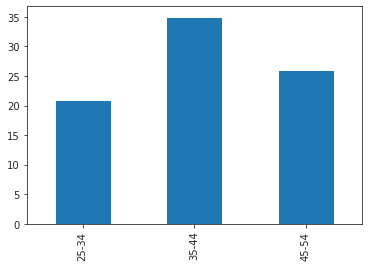

In [11]:
age_bins = ['25-34', '35-44', '45-54']
df.age.value_counts().loc[age_bins].plot(kind='bar')

I'm just playing around, and unlikely to keep most of this:

In [ ]:
age_group = df.groupby('age').agg('mean').iloc[:, 2:7]

In [ ]:
age_group

,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir
age,,,,,
25-34,4.571429,3.666667,3.952381,3.857143,2.428571
35-44,4.057143,3.742857,3.742857,3.800000,3.085714
45-54,4.153846,3.307692,3.538462,3.769231,2.846154


In [ ]:
enjoy =age_group.transpose()

In [ ]:
#Count of responses, not valued As of 6/2/20 no null values in our target demographic #6/20 Null value 'enjoy music' 25--34
enjoy

age,18-24,25-34,35-44,45-54,55-64,65+
enjoy_music,3,20,35,26,10,2
enjoy_sports,3,21,35,26,9,2
enjoy_outdoor,3,21,35,26,9,2
enjoy_culture,3,21,35,26,9,2
enjoy_performances,3,21,35,26,9,2


This is a count of responses, and not an indication of responses!! Need to clean up later! 6/6/20 Done

In [12]:
#Reducing data to focus on target market, as defined by age
df['target'] =df['age'].isin(['25-34', '35-44', '45-54'])

In [15]:
df.shape #6/9/20 Dropped 9 observations due to age outside boundary 6/13 dropped 15: 6/16 dropped 16

(82, 24)

In [14]:
df = df[df['target']==True] #6/2 Notes, this could have been done without replacing target with 0,1 notation. 6/3 Note: Resolved

In [16]:
#Creating a replicable framework for graphing our results
order = ['Strongly Agree', 'Agree',	'Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree' ]

def plot_test(data, ques_name, age_bin, order = order, ax=None):
  plot_df = data[[ques_name, 'age']]
#frequency for each age group
  plotting_data = plot_df[plot_df['age'] == age_bin][ques_name].value_counts()
  sns.barplot(y =plot_df.index,
              x= plot_df.values,
              order=order,
              ax = ax,
              palette = 'Spectral',
              edgecolor ='black'
              ).set_title("Age")

##5/28 Data Cleaning with 2nd round of data collection

In [ ]:
df['event_att'].describe()

count              82
unique              6
top       13 or more.
freq               31
Name: event_att, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 98
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           82 non-null     object
 1   age                 82 non-null     object
 2   zip                 82 non-null     int64 
 3   enjoy_music         81 non-null     object
 4   enjoy_sports        82 non-null     object
 5   enjoy_outdoor       82 non-null     object
 6   enjoy_culture       82 non-null     object
 7   enjoy_performances  82 non-null     object
 8   buy_souvenir        82 non-null     object
 9   event_att           82 non-null     object
 10  save_stub           82 non-null     object
 11  prefer1             80 non-null     object
 12  prefer2             81 non-null     object
 13  want_printed        82 non-null     object
 14  buy_printed         82 non-null     object
 15  ps_printed          80 non-null     object
 16  ps_cust             80 non-n

#Playing with VIZ

H1: If presented with an opportunity, attendees will purchase physical tickets to live events as a collectable souvenir.
H0: Attendees will not purchase souvenir tickets to events when presented an opportunity to buy.

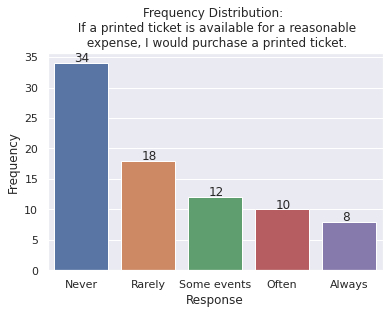

In [17]:
buy_printed = df['buy_printed'].value_counts()
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution: \n If a printed ticket is available for a reasonable\n expense, I would purchase a printed ticket.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
#plt.text(buy_printed.index[1], buy_printed.values[0]+0.2, s=buy_printed.values[0], size= 6)
for i in range(len(buy_printed.values)):
  plt.text((i)-0.1, buy_printed[i]+.2, s=buy_printed[i])
plt.show()

In [ ]:
df['buy_souvenir'].describe()

count                             82
unique                             5
top       Neither Agree nor Disagree
freq                              24
Name: buy_souvenir, dtype: object

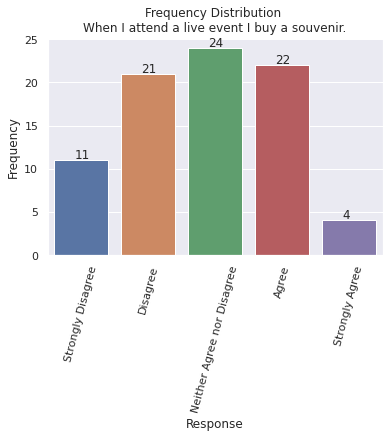

In [18]:
likert_order=['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
buy_souvenir = df['buy_souvenir'].value_counts().loc[likert_order]
sns.set(style='darkgrid')
sns.barplot(buy_souvenir.index, buy_souvenir.values)
plt.title('Frequency Distribution \nWhen I attend a live event I buy a souvenir.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation=75)
for i in range(len(buy_souvenir.values)):
  plt.text((i)-0.1, buy_souvenir[i]+.2, s=buy_souvenir[i])
plt.show()

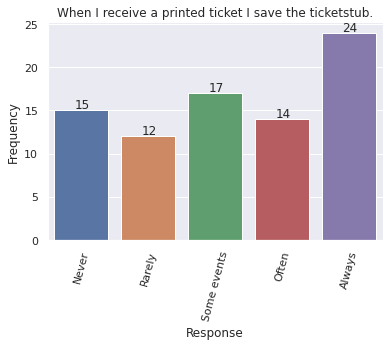

In [19]:
likert_2 = ['Never', 'Rarely', 'Some events', 'Often', 'Always']
save_stub = df['save_stub'].value_counts().loc[likert_2]
sns.set(style='darkgrid')
sns.barplot(save_stub.index, save_stub.values)
plt.title('When I receive a printed ticket I save the ticketstub.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation = 75)
for i in range(len(save_stub.values)):
  plt.text((i)-0.1, save_stub[i]+.2, s=save_stub[i])
plt.show()

In [ ]:
# describe method dropna = true by default
df['save_stub'].describe()

count         82
unique         5
top       Always
freq          24
Name: save_stub, dtype: object

6/2 Notes: this code is unchanged from yesterday, but does not run today. This will need to be investigated later!!\n
6/3 Notes: .loc error related to 'strongly Disagree' not appearing in enjoy_music dataframe. I'm certain a work around would be easy, but it is not significant to analysis. It is enough to know value is zero. The error did not flag before, because we had not filtered the dataframe to only our target market. We had responses for each value before.

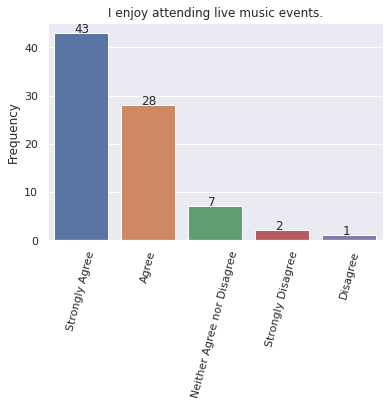

In [20]:
enjoy_music = df['enjoy_music'].value_counts()
sns.barplot(enjoy_music.index, enjoy_music.values)
plt.title('I enjoy attending live music events.')
plt.ylabel('Frequency')
#plt.xlabel('Response')
plt.xticks(rotation = 75)
for i in range(len(enjoy_music.values)):
  plt.text((i)-0.1, enjoy_music[i]+.2, s=enjoy_music[i])
plt.show()

In [ ]:
enjoy_music.describe() #

count     5.000000
mean     16.200000
std      18.539148
min       1.000000
25%       2.000000
50%       7.000000
75%      28.000000
max      43.000000
Name: enjoy_music, dtype: float64

I need to find the error in likert_order. 'Agree' records twice and Disagree has no results.
5/30 Notes: Issue resolved

6/1: Playing around with plotting, unlikely to keep

# Week 5 Homework

In [ ]:
#I ended up not using these packages, but I am saving the work in case I update later.
from IPython import display
from ipywidgets import interact, widgets
import re
import mailbox
import csv

In [ ]:
#pip install IPython

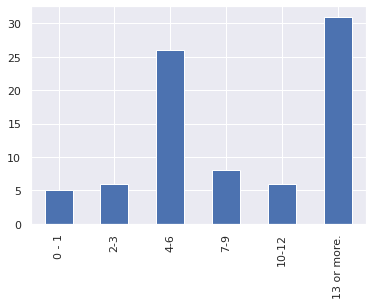

In [ ]:
df['event_att'].value_counts().loc[event_order].plot(kind='bar')

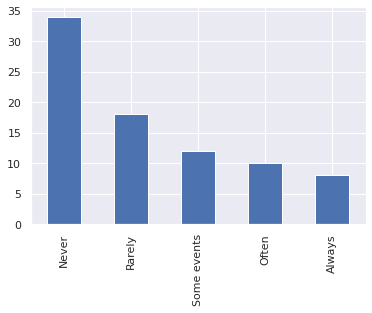

In [ ]:
#Measure of Central Tendency for outcome variable, purchase a printed ticket
df['buy_printed'].value_counts().loc[likert_2].plot(
    kind='bar')

In [21]:
event_order =['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']
abc=pd.crosstab(df['buy_printed'], df['event_att'])
abc= abc[event_order]
abc.sort_index(level=likert_2, inplace=True)
#abc.sort_values(by=likert_2, axis=0)
abc.head()

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,1,0,0,7
Never,3,6,13,3,2,7
Often,1,0,2,1,2,4
Rarely,0,0,5,3,1,9
Some events,1,0,5,1,1,4


Text(0.5, 1.0, 'If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

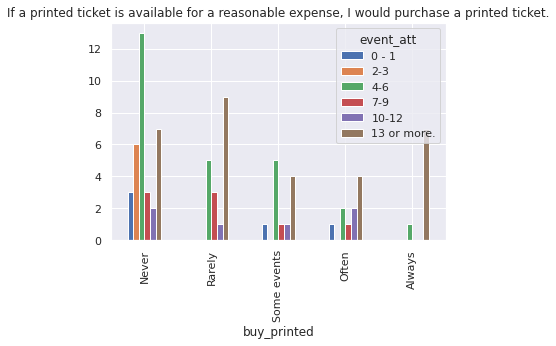

In [22]:
#Our outcome variable, buy ticket
abc.loc[likert_2].plot(kind='bar')
plt.title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

This is a problem. Our desired outcome, purchasing a printed ticket, is showing limited interest among respondants who frequently attend live shows.
6/13 update: Larger sample size reduced impact.

In [23]:
def invariate(question, likert_type):
  column_frequency = df[question].value_counts().loc[likert_type]
  sns.barplot(column_frequency.index, column_frequency.values)
  abc=pd.crosstab(df['buy_printed'], df[question])
  abc=abc[likert_type]
  plt.title('Response to '+ question +'.')
  plt.ylabel('Frequency')
  plt.xlabel('Response')
  plt.xticks(rotation = 75)
  for i in range(len(column_frequency.values)):
    plt.text((i)-0.1, column_frequency[i]+.2, s=column_frequency[i])
    #print(column_frequency.sum())
  #plt.text(2.7, 16, s='no response='+ (72-(column_frequency.sum())))
  plt.show()
  print(abc.head())

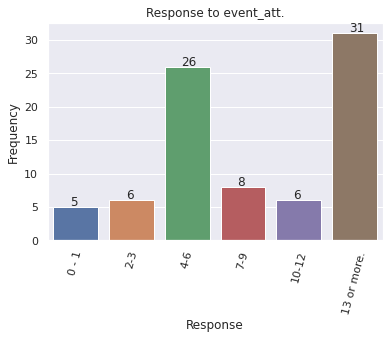

event_att    0 - 1  2-3  4-6  7-9  10-12  13 or more.
buy_printed                                          
Always           0    0    1    0      0            7
Never            3    6   13    3      2            7
Often            1    0    2    1      2            4
Rarely           0    0    5    3      1            9
Some events      1    0    5    1      1            4


In [24]:
invariate('event_att', event_order)

In [25]:
df.shape[0]

82

In [26]:
print(likert_2, likert_order, event_order)

['Never', 'Rarely', 'Some events', 'Often', 'Always'] ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree'] ['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']


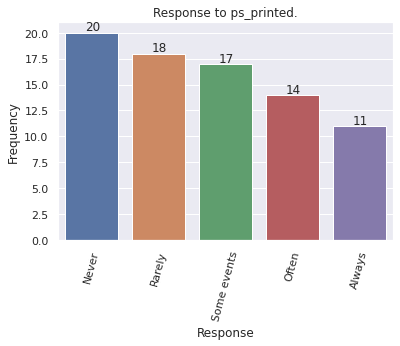

ps_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            2      0       5
Never           14      10            5      3       1
Often            0       0            5      3       2
Rarely           4       8            1      4       1
Some events      1       0            4      4       2


In [ ]:
invariate('ps_printed', likert_2) # Interest in buying a printed ticket to an event with personal significance

If I attend a live event with significance to the team or performer, such as a no hitter, I will purchase a printed ticket.

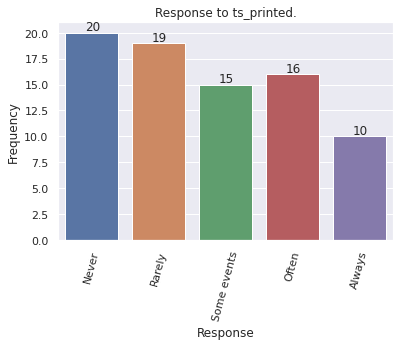

ts_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            1      2       4
Never           14      10            4      3       2
Often            0       1            3      4       2
Rarely           4       7            3      3       1
Some events      1       1            4      4       1


In [ ]:
invariate('ts_printed', likert_2)

If I attend a live event with personal significance, 
such as a family reunion or a loved ones' first game,
I will purchase a customized printed ticket.


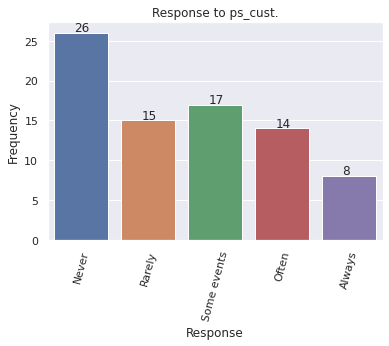

ps_cust      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           2       0            1      2       3
Never           17       5            5      5       1
Often            2       1            3      2       2
Rarely           3       9            4      2       0
Some events      2       0            4      3       2


In [ ]:
print("If I attend a live event with personal significance, \nsuch as a family reunion or a loved ones' first game,\nI will purchase a customized printed ticket.")
invariate('ps_cust', likert_2)

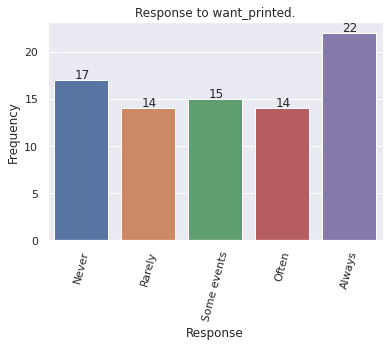

want_printed  Never  Rarely  Some events  Often  Always
buy_printed                                            
Always            1       0            0      0       7
Never            14       7            5      6       2
Often             0       1            2      3       4
Rarely            1       5            4      3       5
Some events       1       1            4      2       4


In [ ]:
invariate('want_printed', likert_2)

In [ ]:
#Two-Way Table indicating Buy Souvenir and Buy Printed variables
grouped_bs = df.groupby(['buy_souvenir', 'buy_printed'])
grouped_bs.size()

buy_souvenir                buy_printed
Agree                       Always          3
                            Never           4
                            Often           4
                            Rarely          7
                            Some events     4
Disagree                    Always          1
                            Never          13
                            Often           2
                            Rarely          4
                            Some events     1
Neither Agree nor Disagree  Always          2
                            Never          10
                            Often           4
                            Rarely          5
                            Some events     3
Strongly Agree              Always          1
                            Rarely          1
                            Some events     2
Strongly Disagree           Always          1
                            Never           7
                            Rarely      

In [ ]:
grouped_bs = df.groupby(['enjoy_music', 'buy_printed'])
grouped_bs.size()

enjoy_music                 buy_printed
Agree                       Always          1
                            Never          13
                            Often           4
                            Rarely          7
                            Some events     3
Disagree                    Never           1
Neither Agree nor Disagree  Never           3
                            Rarely          1
                            Some events     3
Strongly Agree              Always          6
                            Never          16
                            Often           5
                            Rarely         10
                            Some events     6
Strongly Disagree           Always          1
                            Often           1
dtype: int64

##Bar Chart Playing Around

In [ ]:
#Dependant Variable
df.buy_printed.describe()

count        82
unique        5
top       Never
freq         34
Name: buy_printed, dtype: object

In [ ]:
Always_df=df[df['buy_printed']=="Always"]
Often_df=df[df['buy_printed']=="Often"]
Se_df=df[df['buy_printed']=="Some events"]
Rarely_df=df[df['buy_printed']=="Rarely"]
Never_df=df[df['buy_printed']=="Never"]

In [ ]:
Always_list=Always_df['buy_printed'].value_counts()
Often_list=Often_df['buy_printed'].value_counts()
Se_list=Se_df['buy_printed'].value_counts()
Rarely_list=Rarely_df['buy_printed'].value_counts()
Never_list=Never_df['buy_printed'].value_counts()

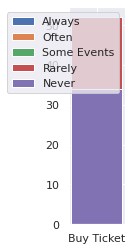

In [ ]:
fig, ax = plt.subplots(figsize=(1, 4))
ax.bar('Buy Ticket', Always_list.values, bottom = 22, label='Always', width=0.85)
ax.bar('Buy Ticket', Often_list.values, bottom=21, label= 'Often', width=0.85)
ax.bar('Buy Ticket', Se_list.values, bottom=20, label='Some Events', width=0.85)
ax.bar('Buy Ticket', Rarely_list.values, bottom=Never_list.values, label= 'Rarely', width=0.85)
ax.bar('Buy Ticket', Never_list.values, bottom=0, label= 'Never', width=0.85)
ax.legend()

No handles with labels found to put in legend.


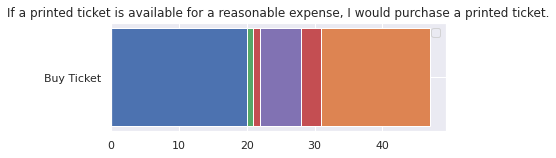

In [ ]:
fig, ax = plt.subplots(figsize = (6, 2))
ax.barh('Buy Ticket', Never_list.values, .8, left=0)
ax.barh('Buy Ticket', Rarely_list.values, .79,left=Never_list.values)
ax.barh('Buy Ticket', Se_list.values, .8, left=20)
ax.barh('Buy Ticket', Often_list.values, .79, left=21)
ax.barh('Buy Ticket', Always_list.values, .8, left=22)
ax.set_title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')
ax.legend()

In [ ]:
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

##6/16 email jumping around->

In [ ]:
df_q_likert_order = df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir']]
df_q_likert_2= df[['save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

In [ ]:
df_q_likert_order.head()

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir
1,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree
2,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree
3,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree
4,Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Agree
6,Strongly Agree,Neither Agree nor Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree


In [ ]:
df_q_likert_2.head()

,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
1,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never
2,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely
3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never
4,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never
6,Always,Some events,Some events,Often,Never,Always,Always,Some events,Some events,Never,Never


##I am essentially transposing the dataframe to lend itself to data Viz

In [ ]:
#pd.get_dummies(df.stack()).groupby(level=1).sum()
#df.values
v = df_q_likert_2.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_2 = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_2.columns, u
)
v = df_q_likert_order.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_order = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_order.columns, u
)

In [ ]:
df_q_likert_2 = df_q_likert_2[likert_2]
df_q_likert_order = df_q_likert_order[likert_order]

In [ ]:
df_q_likert_2.shape #Describes interest in product

(11, 5)

In [ ]:
df_q_likert_2.describe()

,Never,Rarely,Some events,Often,Always
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,28.181818,14.727273,14.272727,11.454545,13.363636
std,16.332900,3.466725,4.496463,3.856518,7.228731
min,14.000000,9.000000,6.000000,4.000000,4.000000
25%,16.500000,13.000000,13.500000,10.500000,9.000000
50%,20.000000,15.000000,15.000000,13.000000,12.000000
75%,32.500000,17.500000,17.000000,14.000000,19.500000
max,59.000000,19.000000,19.000000,16.000000,24.000000


In [ ]:
df_q_likert_2[5:11] #Describes our sample population

,Never,Rarely,Some events,Often,Always
ps_printed,20,18,17,14,13
ps_cust,26,15,17,14,10
ts_printed,20,19,15,16,12
ts_cust,31,15,15,11,10
na_printed,58,9,6,5,4
na_cust,59,9,6,4,4


([<matplotlib.axis.XTick at 0x7fa3e7250780>,
 [Text(0, 0, 'Personal significance|\nGeneric Printed'),
  Text(0, 0, 'Personal significance|\nCustom Printed'),
  Text(0, 0, 'Team significance|\nGeneric Printed'),
  Text(0, 0, 'Team significance|\nCustom Printed')])

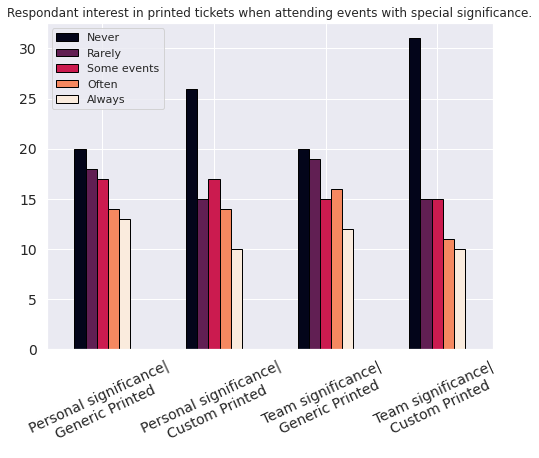

In [ ]:
jibberish = ('Personal significance|\nGeneric Printed', 'Personal significance|\nCustom Printed', 'Team significance|\nGeneric Printed', 'Team significance|\nCustom Printed')
y_posit = np.arange(len(jibberish))
df_q_likert_2[5:9].plot(
    kind='bar',
    figsize=(8, 6),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Respondant interest in printed tickets when attending events with special significance.'
    ).yaxis.label.set_visible(False)
plt.xticks(y_posit, jibberish, rotation = 25)

In [ ]:
df_q_likert_order[4:7]

,Strongly Disagree,Disagree,Neither Agree nor Disagree,Agree,Strongly Agree
enjoy_performances,5,5,15,33,23
buy_souvenir,11,21,24,21,4


This needs to be updated with larger dataset. Current values are hard coded
Resolved 6/113

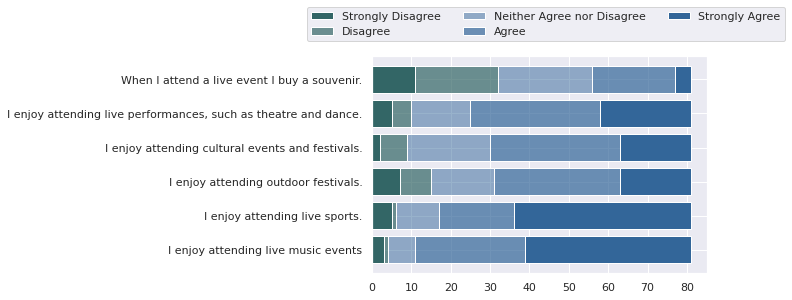

In [ ]:
question_labels = ('I enjoy attending live music events', 'I enjoy attending live sports.', 'I enjoy attending outdoor festivals.', 'I enjoy attending cultural events and festivals.', 'I enjoy attending live performances, such as theatre and dance.', 'When I attend a live event I buy a souvenir.')

#question_labels[0] Enjoy Music
plt.barh(question_labels[0], width=3, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[0], left=3, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[0], left=4, width=7, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[0], left=11, width=28., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[0], left=39, width=42., color=(0.2, 0.4, .6, 1))
#question_labels[1] Enjoy Sports
plt.barh(question_labels[1], width=5, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[1], left=5, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[1], left=6, width=11, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[1], left=17, width=19., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[1], left=36, width=45., color=(0.2, 0.4, .6, 1))
#question_labels[2] Enjoy Outdoor
plt.barh(question_labels[2], width=7, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[2], left=7, width=8, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[2], left=15, width=16, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[2], left=31, width=32, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[2], left=63, width=18, color=(0.2, 0.4, .6, 1))
#question_labels[3] Enjoy Culture
plt.barh(question_labels[3], width=2, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[3], left=2, width=7, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[3], left=9, width=21, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[3], left=30, width=33., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[3], left=63, width=18, color=(0.2, 0.4, .6, 1))
#question_labels[4] Enjoy Performances
plt.barh(question_labels[4], width=5, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[4], left=5, width=5, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[4], left=10, width=15, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[4], left=25, width=33., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[4], left=58, width=23., color=(0.2, 0.4, .6, 1))
#question_labels[5] Buy Souvenir
plt.barh(question_labels[5], width=11, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[5], left=11, width=21, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[5], left=32, width=24, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[5], left=56, width=21, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[5], left=77, width=4., color=(0.2, 0.4, .6, 1))

#Add Legend to plot
# plt.text(-1,6, 'Strongly \nDisagree', color=(0.2, 0.4, 0.4, 1))
# plt.text(4,6.2, likert_order[1], color=(0.2, 0.4, 0.4, .7))
# plt.text(11,6, 'Neither Agree \nnor Disagree', color=(0.2, 0.4, 0.6, .5))
# plt.text(18, 6.2, likert_order[3], color=(0.2, 0.4, .6, .7))
# plt.text(22,6, 'Strongly \nAgree', color=(0.2, 0.4, 0.6, 1))
plt.legend(likert_order, ncol=3, bbox_to_anchor=(1.25, 1.25))
plt.show()

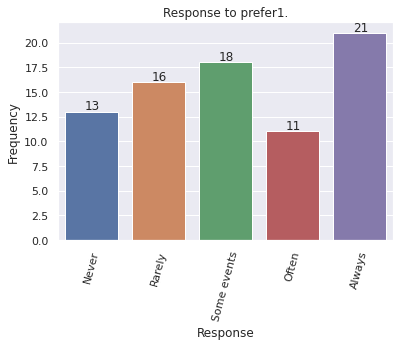

prefer1      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            0      0       7
Never           11      11            5      3       2
Often            0       1            2      3       4
Rarely           0       4            6      4       4
Some events      1       0            5      1       4


In [ ]:
invariate('prefer1', likert_2)

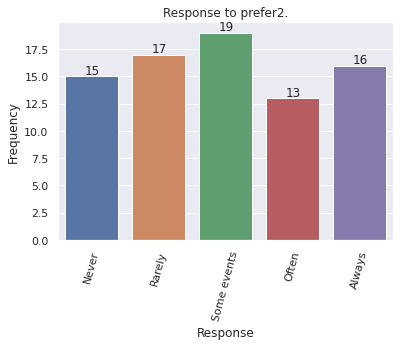

prefer2      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            1      0       6
Never           13      14            3      3       1
Often            0       1            1      5       3
Rarely           0       2            9      3       3
Some events      1       0            5      2       3


In [ ]:
invariate('prefer2', likert_2)

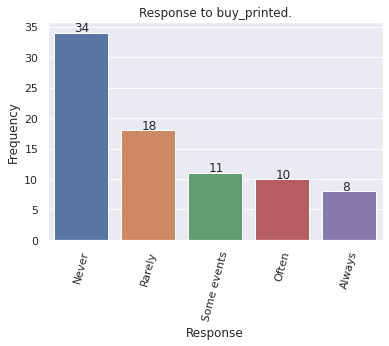

buy_printed  Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       8
Never           34       0            0      0       0
Often            0       0            0     10       0
Rarely           0      18            0      0       0
Some events      0       0           11      0       0


In [ ]:
invariate('buy_printed', likert_2)

In [ ]:
df_q_likert_2[4:5].values

array([[34, 18, 11, 10,  8]])

 Test of Significance -> It is important to note that we have less than 5 respondants expressing an interest in our product. This will create problems for the chi-squared test
6/9 Update: Larger Sample Size reduced concern regarding reliability

In [ ]:
abc

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,1,0,0,7
Never,3,6,13,3,2,7
Often,1,0,2,1,2,4
Rarely,0,0,5,3,1,9
Some events,1,0,5,1,0,4


#Do Both!!
Chi Squared

In [29]:
table=pd.crosstab(df['save_stub'], df['buy_printed'])#
#table = pd.crosstab(df['buy_souvenir'], df['buy_printed'])

In [30]:
from scipy.stats import chi2_contingency, chi2, kruskal

In [31]:
#Degrees of freedom: (4X4)
table

buy_printed,Always,Never,Often,Rarely,Some events
buy_souvenir,,,,,
Agree,3,4,4,7,4
Disagree,1,13,2,4,1
Neither Agree nor Disagree,2,10,4,5,3
Strongly Agree,1,0,0,1,2
Strongly Disagree,1,7,0,1,2


In [32]:
stat, p, dof, expected = chi2_contingency(table)

In [33]:
# interpret test-statistic

print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

buy_printed                 Always  Never  Often  Rarely  Some events
buy_souvenir                                                         
Agree                            3      4      4       7            4
Disagree                         1     13      2       4            1
Neither Agree nor Disagree       2     10      4       5            3
Strongly Agree                   1      0      0       1            2
Strongly Disagree                1      7      0       1            2
dof=16
[[2.14634146 9.12195122 2.68292683 4.82926829 3.2195122 ]
 [2.04878049 8.70731707 2.56097561 4.6097561  3.07317073]
 [2.34146341 9.95121951 2.92682927 5.26829268 3.51219512]
 [0.3902439  1.65853659 0.48780488 0.87804878 0.58536585]
 [1.07317073 4.56097561 1.34146341 2.41463415 1.6097561 ]]
probability=0.950, critical=26.296, stat=19.923
Independent (fail to reject H0)
significance=0.050, p=0.224
Independent (fail to reject H0)


##Kruskal Wallis H-test I will need to map this using a lambda function.

In [34]:
from scipy.stats import mstats
#df.shape
#em=df['enjoy_music']
#es=df['enjoy_sports']
#eo=df['enjoy_outdoor']
#ec=df['enjoy_culture']
#ep=df['enjoy_performances']
#bs=df['buy_souvenir']

In [ ]:
print("Kruskal-Wallis one-way analysis of variance:")
H, pval = mstats.kruskalwallis(em, es, eo, ec, ep, bs)
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
  print("Reject. One or more Samples influences another")
if pval > 0.05:
  print("Accept. Same Distributions")


#Week 6 Homework

In [ ]:
df_chi= df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'buy_printed']]

Spearman Rho:
•	Correlation tables
•	Pearson r and Probability (p) values
•	Level of statistical significance (sig) chosen


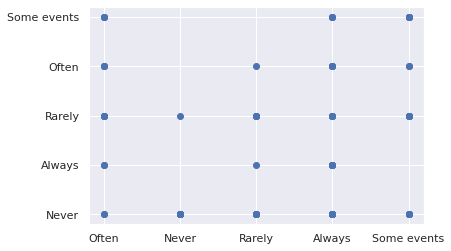

In [ ]:
plt.scatter(df.save_stub, df.buy_printed) #As expected, this lacks value.

#Convert ordinal likert responses to integer values.

In [ ]:
print(likert_2, likert_order) #event order

['Never', 'Rarely', 'Some events', 'Often', 'Always'] ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']


#Testing Replace on 5 observations

In [ ]:
df_test = df.head()

In [ ]:
df_test.replace('Strongly Agree', 5, inplace=True)
df_test.replace('Agree', 4, inplace=True)
df_test.replace('Neither Agree nor Disagree', 3, inplace=True)
df_test.replace('Disagree', 2, inplace=True)
df_test.replace('Strongly Disagree', 1, inplace=True)

df_test.replace('Always', 5, inplace=True)
df_test.replace('Often', 4, inplace=True)
df_test.replace('Some events', 3, inplace=True)
df_test.replace('Rarely', 2, inplace=True)
df_test.replace('Never', 1, inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_test

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open,target
1,2020/05/26 11:58:21 PM MDT,25-34,0,5,5,4,3,5,4,13 or more.,4,2,2,4,1,2,3,2,2,1,1,NaN,NaN,True
2,2020/05/27 12:28:55 AM MDT,35-44,83712,2,4,1,4,3,2,0 - 1,1,1,1,1,1,2,2,2,2,2,2,Enlightening or life changing experience,NaN,True
3,2020/05/27 12:47:13 AM MDT,45-54,98056,5,4,5,5,4,3,2-3,1,2,2,3,1,3,3,2,2,1,1,"First Concert, game or event;Family Vacation;F...",You are swell!,True
4,2020/05/27 1:41:29 AM MDT,35-44,98404,4,3,4,4,4,4,4-6,2,2,2,2,1,2,1,1,1,1,1,"First Concert, game or event;Family Vacation;E...",NaN,True
6,2020/05/27 4:16:19 AM MDT,35-44,33837,5,3,5,5,5,2,2-3,5,3,3,4,1,5,5,3,3,1,1,"First Concert, game or event;Enlightening or l...",NaN,True


In [ ]:
df.head()

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open,target
1,5/26/2020 22:58:21,25-34,0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN,True
2,5/26/2020 23:28:55,35-44,83712,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN,True
3,5/26/2020 23:47:14,45-54,98056,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,2-3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never,"First Concert, game or event, Family Vacation,...",You are swell!,True
4,5/27/2020 0:41:30,35-44,98404,Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Agree,4-6,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never,"First Concert, game or event, Family Vacation,...",NaN,True
6,5/27/2020 3:16:19,35-44,33837,Strongly Agree,Neither Agree nor Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,2-3,Always,Some events,Some events,Often,Never,Always,Always,Some events,Some events,Never,Never,"First Concert, game or event, Enlightening or ...",NaN,True


##Convert string response to numeric value (int, ranked values)

In [49]:
df.replace('Strongly Agree', 5, inplace=True)
df.replace('Agree', 4, inplace=True)
df.replace('Neither Agree nor Disagree', 3, inplace=True)
df.replace('Disagree', 2, inplace=True)
df.replace('Strongly Disagree', 1, inplace=True)

df.replace('Always', 5, inplace=True)
df.replace('Often', 4, inplace=True)
df.replace('Some events', 3, inplace=True)
df.replace('Rarely', 2, inplace=True)
df.replace('Never', 1, inplace=True)

In [50]:
df.describe()

,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
count,82.000000,81.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,80.00000,81.000000,82.000000,82.000000,80.000000,80.000000,80.000000,78.000000,80.00000,80.000000
mean,52819.231707,4.345679,4.219512,3.585366,3.731707,3.804878,2.841463,3.243902,3.11250,2.950617,3.121951,2.268293,2.725000,2.537500,2.712500,2.307692,1.55000,1.512500
std,36512.849472,0.882617,1.122436,1.196200,0.994414,1.115978,1.116316,1.478746,1.44952,1.404468,1.502181,1.370309,1.377716,1.368208,1.370519,1.332001,1.04215,1.006231
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,20224.750000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,1.750000,1.000000,1.750000,1.000000,1.00000,1.000000
50%,46501.500000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.00000,1.000000
75%,91537.250000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.00000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.00000,2.000000
max,99336.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 98
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quizTaken           82 non-null     object 
 1   age                 82 non-null     object 
 2   zip                 82 non-null     int64  
 3   enjoy_music         81 non-null     float64
 4   enjoy_sports        82 non-null     int64  
 5   enjoy_outdoor       82 non-null     int64  
 6   enjoy_culture       82 non-null     int64  
 7   enjoy_performances  82 non-null     int64  
 8   buy_souvenir        82 non-null     int64  
 9   event_att           82 non-null     object 
 10  save_stub           82 non-null     int64  
 11  prefer1             80 non-null     float64
 12  prefer2             81 non-null     float64
 13  want_printed        82 non-null     int64  
 14  buy_printed         82 non-null     int64  
 15  ps_printed          80 non-null     float64
 16  ps_cust   

Why would some be integers and some floats? This feels odd...

In [ ]:
from scipy.stats import spearmanr

In [ ]:
coef, p = spearmanr(df.buy_printed, df.save_stub)

In [ ]:
coef

0.4089981677808866

In [ ]:
p

0.00013614621651262323

In [ ]:
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.5f' % p)

Spearmans correlation coefficient: 0.409
Samples are correlated (reject H0) p=0.00014


In [ ]:
coef, p = spearmanr(df.buy_printed, df.buy_souvenir)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.5f' % p)
 #add moderate, medium, strong or weak to language

Spearmans correlation coefficient: 0.358
Samples are correlated (reject H0) p=0.00102


In [ ]:
df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances']].corr(method='spearman')

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances
enjoy_music,1.000000,0.342956,0.323980,0.171725,0.222439
enjoy_sports,0.342956,1.000000,0.368523,0.059003,-0.019785
enjoy_outdoor,0.323980,0.368523,1.000000,0.305083,0.124941
enjoy_culture,0.171725,0.059003,0.305083,1.000000,0.445434
enjoy_performances,0.222439,-0.019785,0.124941,0.445434,1.000000


From Docs
 with sns.axes_style("white"):  
    ...     f, ax = plt.subplots(figsize=(7, 5))  
    ...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True) 

In [ ]:
df.head()

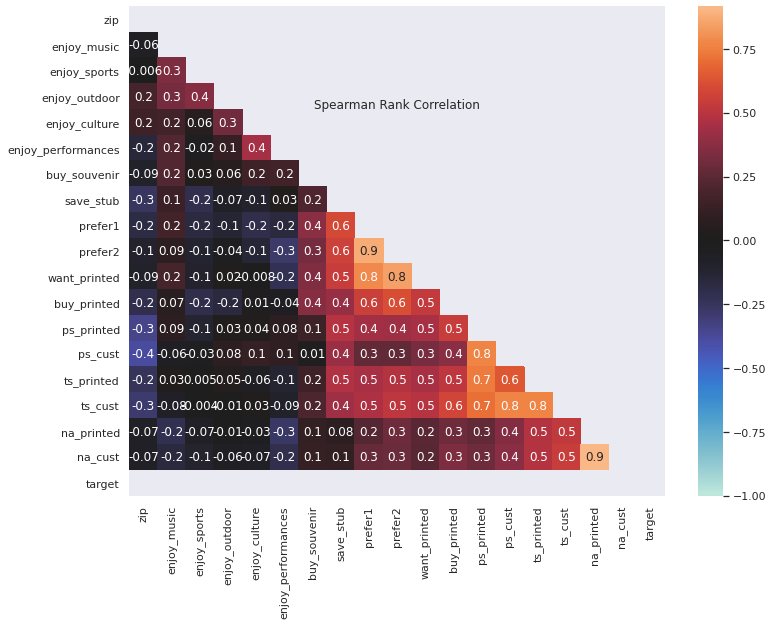

In [ ]:
tri= np.triu(df.corr())#this just provides a shape, no need to define a method
f, ax =plt.subplots(figsize=(12,9))
plt.title('Spearman Rank Correlation', pad=-102, loc='center')
ax = sns.heatmap(df.corr(method='spearman'), annot= True, fmt='.1g', mask=tri, vmin=-1, center=0)


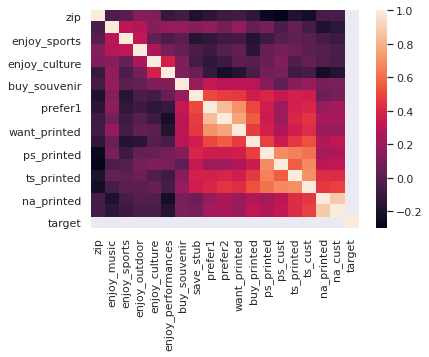

In [ ]:
sns.heatmap(df.corr(method='kendall'))

In [ ]:
## From earlier analysis:
df_attributes = df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir']]
df_behaviors= df[['save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

Correlations of this data may help us understand our key customers, and the types of events they attend

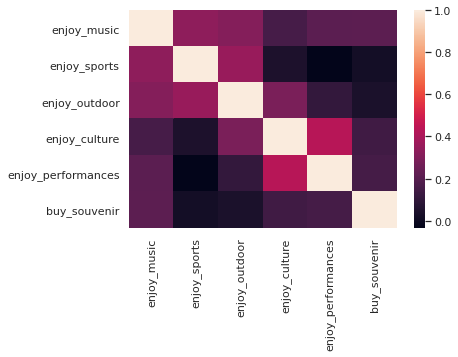

In [ ]:
sns.heatmap(df_attributes.corr(method=('spearman')))

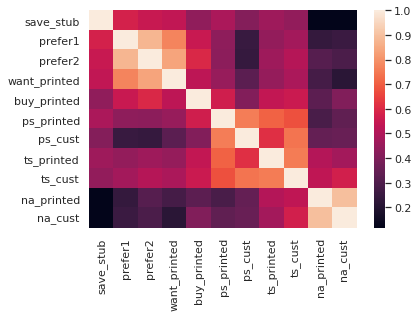

In [ ]:
sns.heatmap(df_behaviors.corr())

In [ ]:
np.corrcoef(df.buy_printed, df.save_stub)

array([[1.       , 0.4353626],
       [0.4353626, 1.       ]])

In [ ]:
df_attributes.corr(method='spearman')

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir
enjoy_music,1.000000,0.337448,0.313469,0.157524,0.210403,0.216602
enjoy_sports,0.337448,1.000000,0.360618,0.045969,-0.033267,0.020406
enjoy_outdoor,0.313469,0.360618,1.000000,0.287807,0.106114,0.040686
enjoy_culture,0.157524,0.045969,0.287807,1.000000,0.433015,0.142273
enjoy_performances,0.210403,-0.033267,0.106114,0.433015,1.000000,0.156378
buy_souvenir,0.216602,0.020406,0.040686,0.142273,0.156378,1.000000


In [ ]:
df_behaviors.corr(method='spearman')

,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
save_stub,1.000000,0.587821,0.548560,0.534832,0.428221,0.484176,0.403178,0.465095,0.419670,0.072422,0.100237
prefer1,0.587821,1.000000,0.874023,0.778921,0.581319,0.427502,0.251794,0.443187,0.461312,0.224245,0.273124
prefer2,0.548560,0.874023,1.000000,0.838445,0.638233,0.421969,0.251389,0.470702,0.507496,0.291810,0.281283
want_printed,0.534832,0.778921,0.838445,1.000000,0.553013,0.443149,0.316037,0.441224,0.484881,0.238106,0.231915
buy_printed,0.428221,0.581319,0.638233,0.553013,1.000000,0.568109,0.401020,0.533514,0.602864,0.303847,0.353001
ps_printed,0.484176,0.427502,0.421969,0.443149,0.568109,1.000000,0.761173,0.729417,0.701157,0.264600,0.295164
ps_cust,0.403178,0.251794,0.251389,0.316037,0.401020,0.761173,1.000000,0.632580,0.765111,0.352328,0.365687
ts_printed,0.465095,0.443187,0.470702,0.441224,0.533514,0.729417,0.632580,1.000000,0.758659,0.479378,0.483845
ts_cust,0.419670,0.461312,0.507496,0.484881,0.602864,0.701157,0.765111,0.758659,1.000000,0.523465,0.543877
na_printed,0.072422,0.224245,0.291810,0.238106,0.303847,0.264600,0.352328,0.479378,0.523465,1.000000,0.915829


In [ ]:
new_columns =['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed',
 'buy_printed']

In [ ]:
df_new= df[new_columns]

In [ ]:
df_new.head()

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed
1,5.0,5,4,3,5,4,13 or more.,4,2.0,2.0,4,1
2,2.0,4,1,4,3,2,0 - 1,1,1.0,1.0,1,1
3,5.0,4,5,5,4,3,2-3,1,2.0,2.0,3,1
4,4.0,3,4,4,4,4,4-6,2,2.0,2.0,2,1
6,5.0,3,5,5,5,2,2-3,5,3.0,3.0,4,1


##Spearman

In [ ]:
df_new.corr(method='spearman')

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,save_stub,prefer1,prefer2,want_printed,buy_printed
enjoy_music,1.000000,0.342956,0.323980,0.171725,0.222439,0.225690,0.142624,0.173580,0.086807,0.188876,0.065158
enjoy_sports,0.342956,1.000000,0.368523,0.059003,-0.019785,0.032096,-0.205741,-0.168614,-0.109600,-0.095683,-0.193677
enjoy_outdoor,0.323980,0.368523,1.000000,0.305083,0.124941,0.059491,-0.071151,-0.131165,-0.038975,0.018217,-0.161038
enjoy_culture,0.171725,0.059003,0.305083,1.000000,0.445434,0.159095,-0.100469,-0.194474,-0.135531,-0.007647,0.010659
enjoy_performances,0.222439,-0.019785,0.124941,0.445434,1.000000,0.172298,0.034771,-0.158689,-0.277764,-0.225560,-0.042967
buy_souvenir,0.225690,0.032096,0.059491,0.159095,0.172298,1.000000,0.214579,0.377526,0.324606,0.352139,0.364011
save_stub,0.142624,-0.205741,-0.071151,-0.100469,0.034771,0.214579,1.000000,0.598230,0.560116,0.546941,0.408998
prefer1,0.173580,-0.168614,-0.131165,-0.194474,-0.158689,0.377526,0.598230,1.000000,0.877628,0.785165,0.556832
prefer2,0.086807,-0.109600,-0.038975,-0.135531,-0.277764,0.324606,0.560116,0.877628,1.000000,0.843488,0.613081
want_printed,0.188876,-0.095683,0.018217,-0.007647,-0.225560,0.352139,0.546941,0.785165,0.843488,1.000000,0.530996


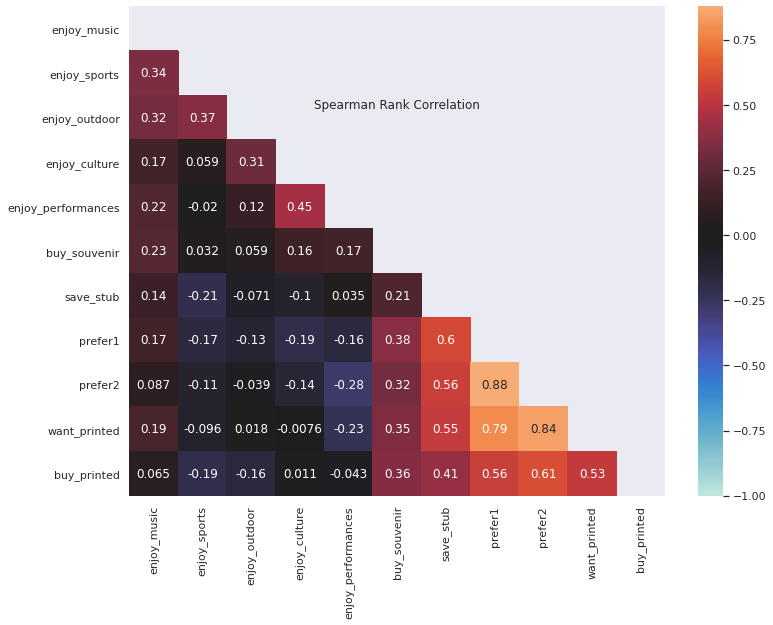

In [ ]:
tri= np.triu(df_new.corr(method='spearman'))
f, ax =plt.subplots(figsize=(12,9))
plt.title('Spearman Rank Correlation', pad=-102, loc='center')
ax = sns.heatmap(df_new.corr(method='spearman'), annot= True, fmt='.2g', mask=tri, vmin=-1, center=0)
#sns.heatmap(df_new.corr(method='spearman'))#, mask=tri)

In [ ]:
buy_printed_spear_corr=df_new.corr(method='spearman').iloc[10:11]

In [ ]:
buy_printed_spear_corr

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,save_stub,prefer1,prefer2,want_printed,buy_printed
buy_printed,0.057211,-0.201778,-0.175322,-0.003861,-0.056202,0.358394,0.428221,0.581319,0.638233,0.553013,1.0


In [ ]:
##Kendall's Rank Correlation  buy_printed & save_stub
from scipy.stats import kendalltau

In [ ]:
k_coef, k_p = kendalltau(df_new.buy_printed, df_new.save_stub)
print('Kendall correlation coefficient: %.3f' % k_coef)
# interpret the significance
alpha = 0.05
if k_p > alpha:
	print('Samples are uncorrelated (fail to reject H0) k_p=%.3f' % k_p)
else:
	print('Samples are correlated (reject H0) k_p=%.3f' % k_p)

Kendall correlation coefficient: 0.353
Samples are correlated (reject H0) k_p=0.000


In [ ]:
k_coef, k_p = kendalltau(df_new.buy_printed, df_new.buy_souvenir)
print('Kendall correlation coefficient: %.3f' % k_coef)
# interpret the significance
alpha = 0.05
if k_p > alpha:
	print('Samples are uncorrelated (fail to reject H0) k_p=%.3f' % k_p)
else:
	print('Samples are correlated (reject H0) k_p=%.3f' % k_p)

Kendall correlation coefficient: 0.301
Samples are correlated (reject H0) k_p=0.001


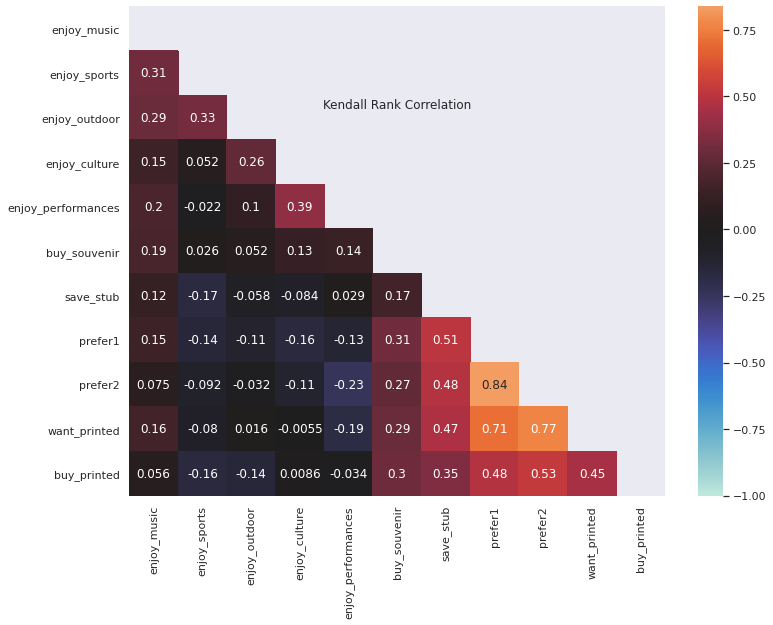

In [ ]:
f, ax =plt.subplots(figsize=(12,9))
plt.title('Kendall Rank Correlation', pad=-102, loc='center')

ax = sns.heatmap(df_new.corr(method='kendall'), annot= True, fmt='.2g', mask=tri, vmin=-1, center=0)

In [ ]:
print(columns, new_columns)

['quizTaken', 'age', 'zip', 'enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust', 'when_cust', 'open'] ['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed']


In [ ]:
df.event_att.describe

<bound method NDFrame.describe of 1     13 or more.
2           0 - 1
3             2-3
4             4-6
6             2-3
         ...     
88    13 or more.
89            4-6
90    13 or more.
91    13 or more.
92    13 or more.
Name: event_att, Length: 81, dtype: object>

In [ ]:
df_signif = df[['buy_printed', 'buy_souvenir', 'save_stub', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

In [ ]:
df_signif.head()

,buy_printed,buy_souvenir,save_stub,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
1,1,4,4,2.0,3.0,2.0,2.0,1.0,1.0
2,1,2,1,2.0,2.0,2.0,2.0,2.0,2.0
3,1,3,1,3.0,3.0,2.0,2.0,1.0,1.0
4,1,4,2,2.0,1.0,1.0,1.0,1.0,1.0
6,1,2,5,5.0,5.0,3.0,3.0,1.0,1.0


Extra Stuff

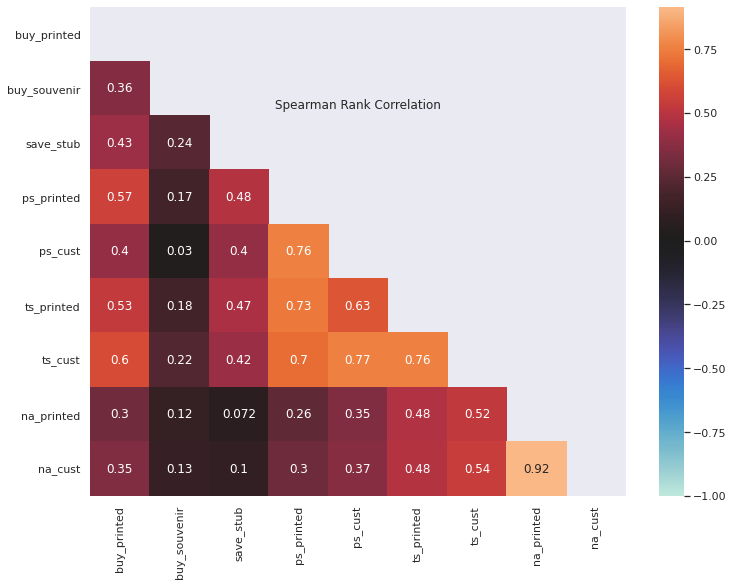

In [ ]:
tri= np.triu(df_signif.corr(method='spearman'))
f, ax =plt.subplots(figsize=(12,9))
plt.title('Spearman Rank Correlation', pad=-102, loc='center')
ax = sns.heatmap(df_signif.corr(method='spearman'), annot= True, fmt='.2g', mask=tri, vmin=-1, center=0)

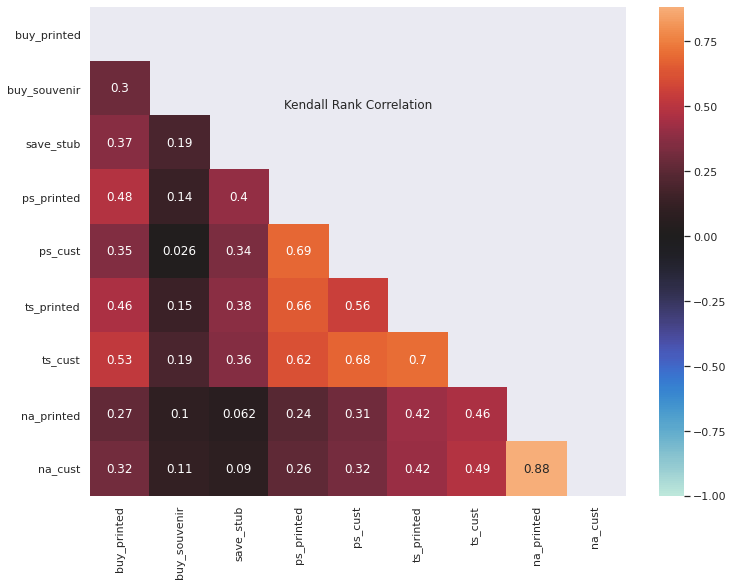

In [ ]:
tri= np.triu(df_signif.corr(method='kendall'))
f, ax =plt.subplots(figsize=(12,9))
plt.title('Kendall Rank Correlation', pad=-102, loc='center')
ax = sns.heatmap(df_signif.corr(method='kendall'), annot= True, fmt='.2g', mask=tri, vmin=-1, center=0)

In [ ]:
df_signif.corr(method='kendall')

,buy_printed,buy_souvenir,save_stub,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
buy_printed,1.000000,0.297115,0.370276,0.480951,0.352695,0.460892,0.527028,0.271362,0.315585
buy_souvenir,0.297115,1.000000,0.193202,0.136833,0.026412,0.146133,0.192449,0.102807,0.112022
save_stub,0.370276,0.193202,1.000000,0.399920,0.338463,0.378116,0.364022,0.061924,0.089769
ps_printed,0.480951,0.136833,0.399920,1.000000,0.690810,0.655340,0.615502,0.236588,0.262301
ps_cust,0.352695,0.026412,0.338463,0.690810,1.000000,0.559536,0.683506,0.309790,0.320119
ts_printed,0.460892,0.146133,0.378116,0.655340,0.559536,1.000000,0.700198,0.423068,0.419212
ts_cust,0.527028,0.192449,0.364022,0.615502,0.683506,0.700198,1.000000,0.460683,0.485508
na_printed,0.271362,0.102807,0.061924,0.236588,0.309790,0.423068,0.460683,1.000000,0.883797
na_cust,0.315585,0.112022,0.089769,0.262301,0.320119,0.419212,0.485508,0.883797,1.000000


In [ ]:
df_signif.corr(method='spearman')

,buy_printed,buy_souvenir,save_stub,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
buy_printed,1.000000,0.358394,0.428221,0.568109,0.401020,0.533514,0.602864,0.303847,0.353001
buy_souvenir,0.358394,1.000000,0.238874,0.167715,0.030426,0.178959,0.224957,0.118706,0.127504
save_stub,0.428221,0.238874,1.000000,0.484176,0.403178,0.465095,0.419670,0.072422,0.100237
ps_printed,0.568109,0.167715,0.484176,1.000000,0.761173,0.729417,0.701157,0.264600,0.295164
ps_cust,0.401020,0.030426,0.403178,0.761173,1.000000,0.632580,0.765111,0.352328,0.365687
ts_printed,0.533514,0.178959,0.465095,0.729417,0.632580,1.000000,0.758659,0.479378,0.483845
ts_cust,0.602864,0.224957,0.419670,0.701157,0.765111,0.758659,1.000000,0.523465,0.543877
na_printed,0.303847,0.118706,0.072422,0.264600,0.352328,0.479378,0.523465,1.000000,0.915829
na_cust,0.353001,0.127504,0.100237,0.295164,0.365687,0.483845,0.543877,0.915829,1.000000


##Week 7 ANOVA and t-test

Open the data set from your research project that you submitted in week 4. Then import the dataset and produce an appropriate test of significance output (ANOVA or t-Test). Justify the variables your used in your test and explain why this is the most appropriate test for your evaluation question.
Your selection of variables, the question you raise and your presentation of findings should be consistent with the logic of the project's hypothesis. Avoid presenting any data that you will not use in the analysis.

In [35]:
df.info() #Not all code has been run, this section is added on to complete week 7 homework. Zip code has been cleaned and age reduced to target market

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 98
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           82 non-null     object
 1   age                 82 non-null     object
 2   zip                 82 non-null     int64 
 3   enjoy_music         81 non-null     object
 4   enjoy_sports        82 non-null     object
 5   enjoy_outdoor       82 non-null     object
 6   enjoy_culture       82 non-null     object
 7   enjoy_performances  82 non-null     object
 8   buy_souvenir        82 non-null     object
 9   event_att           82 non-null     object
 10  save_stub           82 non-null     object
 11  prefer1             80 non-null     object
 12  prefer2             81 non-null     object
 13  want_printed        82 non-null     object
 14  buy_printed         82 non-null     object
 15  ps_printed          80 non-null     object
 16  ps_cust             80 non-n

In [ ]:
df.info()

In [ ]:
df.groupby('age').buy_printed.value_counts(normalize=True)

age    buy_printed
18-24  Rarely         0.666667
       Some events    0.333333
25-34  Never          0.476190
       Rarely         0.285714
       Always         0.142857
       Often          0.047619
       Some events    0.047619
35-44  Never          0.400000
       Rarely         0.228571
       Some events    0.200000
       Often          0.142857
       Always         0.028571
45-54  Never          0.384615
       Always         0.153846
       Often          0.153846
       Rarely         0.153846
       Some events    0.153846
55-64  Never          0.333333
       Rarely         0.333333
       Some events    0.333333
65+    Often          0.500000
       Some events    0.500000
Name: buy_printed, dtype: float64

In [ ]:
df_new['age']= df['age']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
import statsmodels
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [ ]:
#Does it make sense to run ANOVA among full dataset, or just attributes and outcome? df_q_likert order includes behaviour questions and buy souvenir behavior. If we want to know which groups 

In [ ]:
y = df.buy_printed

In [ ]:
#columns.remove('buy_printed')
print(df_new.columns)

Index(['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture',
       'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub',
       'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'age'],
      dtype='object')


In [ ]:
X= df[['buy_souvenir', 'save_stub']]
X=np.asarray(X)

In [ ]:
y = np.asarray(y)

In [ ]:
model = sm.OLS(y, X) #Describes model

In [ ]:
results = model.fit() #CReates regression results wrapper

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              153.9
Date:                Sun, 21 Jun 2020   Prob (F-statistic):                    3.77e-28
Time:                        02:10:00   Log-Likelihood:                         -131.41
No. Observations:                  82   AIC:                                      266.8
Df Residuals:                      80   BIC:                                      271.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##TRying to replicate using categorical values, ya know... for fun

In [37]:
df.head()

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open,target
1,5/26/2020 22:58:21,25-34,0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN,True
2,5/26/2020 23:28:55,35-44,83712,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN,True
3,5/26/2020 23:47:14,45-54,98056,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,2-3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never,"First Concert, game or event, Family Vacation,...",You are swell!,True
4,5/27/2020 0:41:30,35-44,98404,Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Agree,4-6,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never,"First Concert, game or event, Family Vacation,...",NaN,True
6,5/27/2020 3:16:19,35-44,33837,Strongly Agree,Neither Agree nor Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,2-3,Always,Some events,Some events,Often,Never,Always,Always,Some events,Some events,Never,Never,"First Concert, game or event, Enlightening or ...",NaN,True


In [ ]:
df_q_likert_2.head()

In [ ]:
df_q_likert_order.head()

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir
1,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree
2,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree
3,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree
4,Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Agree
6,Strongly Agree,Neither Agree nor Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree


In [ ]:
df_ANOVA = df_q_likert_2[['buy_printed', 'save_stub']]
df_ANOVA['buy_souvenir']= df_q_likert_order['buy_souvenir']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_ANOVA.head()#This is unneccessary, we outline columns as part of dmatrices function.

,buy_printed,save_stub,buy_souvenir
1,Never,Often,Agree
2,Never,Never,Disagree
3,Never,Never,Neither Agree nor Disagree
4,Never,Rarely,Agree
6,Never,Always,Disagree


In [38]:
from patsy import dmatrices

Need 2 design matrices: Endogenous and Exogenous variables

In [ ]:
df

In [39]:
y, X =dmatrices('buy_printed ~ save_stub + buy_souvenir', data=df, return_type='dataframe')

In [40]:
y[:3]#So, this is a problem. I'm pretty sure I need shape of 1...

,buy_printed[Always],buy_printed[Never],buy_printed[Often],buy_printed[Rarely],buy_printed[Some events]
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0


In [41]:
X[:3]

,Intercept,save_stub[T.Never],save_stub[T.Often],save_stub[T.Rarely],save_stub[T.Some events],buy_souvenir[T.Disagree],buy_souvenir[T.Neither Agree nor Disagree],buy_souvenir[T.Strongly Agree],buy_souvenir[T.Strongly Disagree]
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


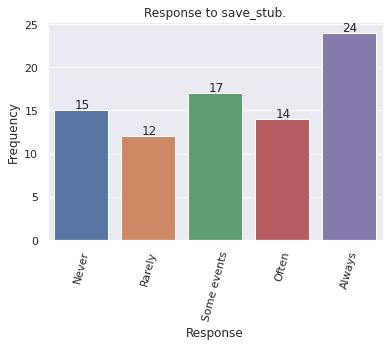

save_stub    Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       1            0      2       5
Never           13       6            5      2       8
Often            0       1            2      3       4
Rarely           1       4            5      4       4
Some events      1       0            5      3       3


In [ ]:
invariate('save_stub', likert_2)

In [ ]:
y = df['buy_printed'].dropna()

In [ ]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model 

In [ ]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model 
#I never added a constant to the model, FYI: http://web.ist.utl.pt/~ist11038/compute/errtheory/,regression/regrthroughorigin.pdf

                            OLS Regression Results                            
Dep. Variable:            buy_printed   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.293
Date:                Sun, 21 Jun 2020   Prob (F-statistic):            0.00291
Time:                        01:37:03   Log-Likelihood:                -129.05
No. Observations:                  82   AIC:                             276.1
Df Residuals:                      73   BIC:                             297.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'het_scale',
 'initialize',
 'k_constant',
 'llf',
 'loa

Kruskal-Wallis test: Pair-wise comparisons innefficient
Non-parametric version of ANOVA: Do my samples have a different distribution?
H0: All samples drawn from same distribution. (All median values equal) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [ ]:
df_ANOVA.head()

In [ ]:
stat, p = kruskal(df_q_likert_order.enjoy_music, df_q_likert_order.enjoy_sports)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.777, p=0.183
Same distributions (fail to reject H0)


In [ ]:
df_q_likert_order.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
stat, p = kruskal(df_q_likert_order.enjoy_music, df_q_likert_order.enjoy_sports)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.777, p=0.183
Same distributions (fail to reject H0)


In [ ]:
X1 = np.asarray(df.enjoy_music)
X2 = np.asarray(df.enjoy_sports)

In [ ]:
stat, p = kruskal(X1, X2)
print('Test Statistic=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Test Statistic=nan, p=nan
Different distributions (reject H0)


In this case, enjoy sports and enjoy music, we see that both samples have the same distribution

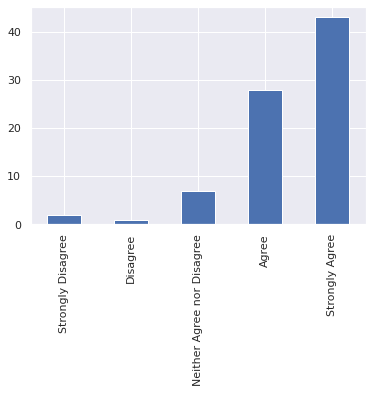

In [ ]:
df_q_likert_order['enjoy_music'].value_counts().loc[likert_order].plot(kind='bar')


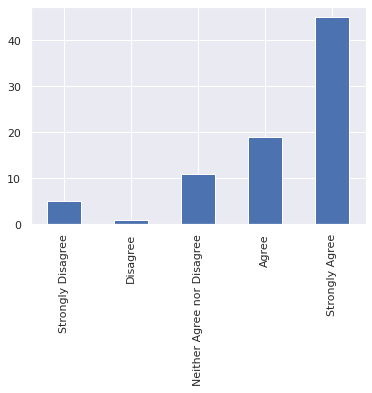

In [ ]:
df_q_likert_order['enjoy_sports'].value_counts().loc[likert_order].plot(kind='bar')

res: results from model built using categorical string values

results is same, built using integers for ranked categories

I think I'm off track here: I will break results into 3 seperate independant groups, age bracket.

In [80]:
cde = df.groupby(by='age')['buy_printed', 'save_stub', 'buy_souvenir'].mean() #only works for integer values of inputs.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average response by age, likert converted to 1-5 scale')

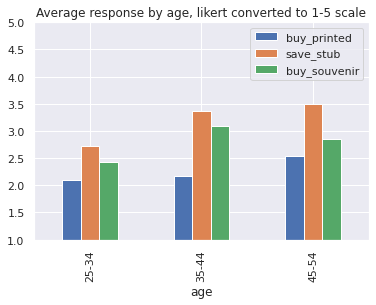

In [92]:
cde.plot(kind='bar')
plt.legend(loc='upper right')
plt.ylim(1, 5)
plt.title('Average response by age, likert converted to 1-5 scale')

In [71]:
youngest= df[df['age'] == '25-34']
mid = df[df['age']== '35-44']
eldest = df[df['age'] == '45-54']

In [ ]:
eldest.head(3)

In [75]:
y_youngest = youngest.buy_printed
y_mid = mid.buy_printed
y_eldest= eldest.buy_printed

In [93]:
stat, p = stats.kruskal(y_youngest, y_mid, y_eldest, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.194, p=0.551
Same distributions (fail to reject H0)


In [94]:
df['event_att'].head()

1    13 or more.
2          0 - 1
3            2-3
4            4-6
6            2-3
Name: event_att, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average response by number of events attended\n in previous 18 months, likert converted to 1-5 scale')

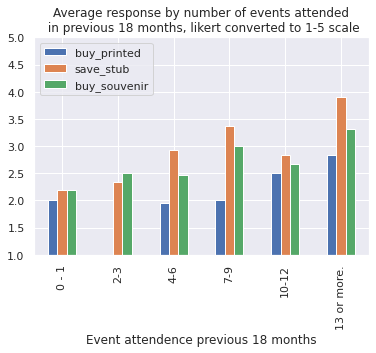

In [103]:
efg = df.groupby(by='event_att')['buy_printed', 'save_stub', 'buy_souvenir'].mean() #only works for integer values of inputs.
#cde = df.groupby(by='age')['buy_printed', 'save_stub', 'buy_souvenir'].mean() #only works for integer values of inputs.
efg.loc[event_order].plot(kind='bar')
plt.legend(loc='upper left')
plt.ylim(1, 5)
plt.xlabel('Event attendence previous 18 months')
plt.title('Average response by number of events attended\n in previous 18 months, likert converted to 1-5 scale')

In [120]:
efg

,buy_printed,save_stub,buy_souvenir
event_att,,,
0 - 1,2.000000,2.200000,2.200000
10-12,2.500000,2.833333,2.666667
13 or more.,2.838710,3.903226,3.322581
2-3,1.000000,2.333333,2.500000
4-6,1.961538,2.923077,2.461538
7-9,2.000000,3.375000,3.000000


In [137]:
low_att= df['buy_printed'].loc[(df['event_att'] == '0 - 1')]#
two_att =df['buy_printed'].loc[(df['event_att'] == '2-3')]#
four_att= df['buy_printed'].loc[(df['event_att'] == '4-6')]#
seven_att =df['buy_printed'].loc[(df['event_att'] == '7-9')]#
ten_att= df['buy_printed'].loc[(df['event_att'] == '10-12')]#
thirteen_att =df['buy_printed'].loc[(df['event_att'] == '13 or more.')]#

In [115]:
stat, p = stats.kruskal(low_att, two_att, four_att, seven_att, ten_att, thirteen_att, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=13.651, p=0.018
Different distributions (reject H0)


In [122]:
pip install scikit-posthocs

In [123]:
import scikit_posthocs as sp

In [138]:
print(len(low_att), len(two_att))

5 6


In [131]:
sp.posthoc_dunn([two_att, four_att, seven_att, ten_att, thirteen_att])

,1,2,3,4,5
1,-1.000000,0.060729,0.080931,0.029497,0.000993
2,0.060729,-1.000000,0.817769,0.368438,0.019912
3,0.080931,0.817769,-1.000000,0.560721,0.184758
4,0.029497,0.368438,0.560721,-1.000000,0.634968
5,0.000993,0.019912,0.184758,0.634968,-1.000000


In [139]:
X_age = [low_att, two_att, four_att, seven_att, ten_att, thirteen_att]

In [144]:
#X_age=df.age
Y_age = df.buy_printed
Y_age = np.asarray(Y_age)

In [141]:
sp.posthoc_dunn(a=X_age)

,1,2,3,4,5,6
1,-1.000000,0.176920,0.954719,0.830562,0.472321,0.179297
2,0.176920,-1.000000,0.061966,0.081883,0.030007,0.001022
3,0.954719,0.061966,-1.000000,0.815653,0.368295,0.019836
4,0.830562,0.081883,0.815653,-1.000000,0.561945,0.185363
5,0.472321,0.030007,0.368295,0.561945,-1.000000,0.634558
6,0.179297,0.001022,0.019836,0.185363,0.634558,-1.000000


In [148]:
dunn =sp.posthoc_dunn(a=X_age) #, val_col=Y_age)#Needs Work

In [51]:
## More playing, week 7 still, but into week 8
#Using integer for responses

In [54]:
y, X = dmatrices('buy_printed ~ buy_souvenir + save_stub', data=df, return_type='dataframe')

In [116]:
X[:4]

,Intercept,buy_souvenir,save_stub
1,1.0,4.0,4.0
2,1.0,2.0,1.0
3,1.0,3.0,1.0
4,1.0,4.0,2.0


In [57]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model 

                            OLS Regression Results                            
Dep. Variable:            buy_printed   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.66e-05
Time:                        20:27:14   Log-Likelihood:                -131.08
No. Observations:                  82   AIC:                             268.2
Df Residuals:                      79   BIC:                             275.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3472      0.433      0.801   

In [66]:
print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.208   
Dependent Variable: buy_printed      AIC:                268.1587
Date:               2020-06-21 20:51 BIC:                275.3789
No. Observations:   82               Log-Likelihood:     -131.08 
Df Model:           2                F-statistic:        11.66   
Df Residuals:       79               Prob (F-statistic): 3.66e-05
R-squared:          0.228            Scale:              1.4865  
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept        0.3472    0.4333  0.8012  0.4254  -0.5153  1.2096
buy_souvenir     0.2902    0.1246  2.3293  0.0224   0.0422  0.5381
save_stub        0.3381    0.0940  3.5951  0.0006   0.1509  0.5252
-----------------------------------------------------------------
Omnibus:             

In [58]:
print(res.params, res.pvalues, res.rsquared)

Intercept       0.347156
buy_souvenir    0.290155
save_stub       0.338072
dtype: float64 Intercept       0.425413
buy_souvenir    0.022400
save_stub       0.000563
dtype: float64 0.2278856488330756


In [59]:
sm.stats.linear_rainbow(res)#Null hypothesis: correctly modeled as linear, output is f-statistic, second is p-value

(1.1550515421362726, 0.3281101937665587)

In [60]:
sm.stats.linear_harvey_collier(res) #Null hypothesis: correctly modeled as linear

Ttest_1sampResult(statistic=2.4904151598398436, pvalue=0.014884948271533645)

In [ ]:
sm.stats.linear_lm(res, X) #Needs troubleshooting, probably issue with log of null?

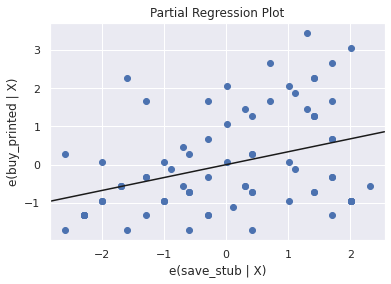

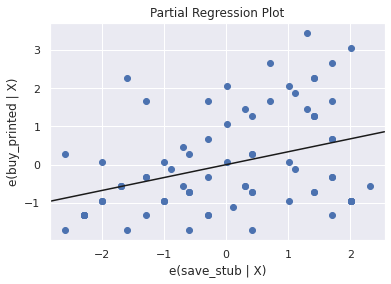

In [64]:
sm.graphics.plot_partregress('buy_printed', 'save_stub', ['buy_souvenir'], data=df, obs_labels=False)

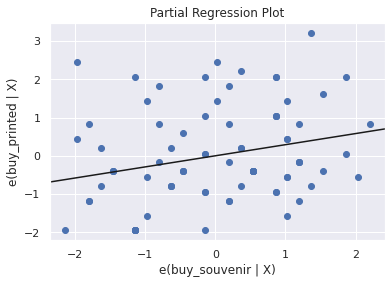

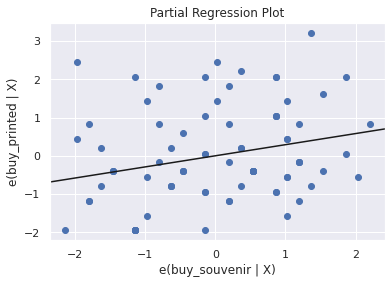

In [65]:
sm.graphics.plot_partregress('buy_printed', 'buy_souvenir', ['save_stub'], data=df, obs_labels=False)